In [1]:
from defectlib import extract_features_from_defect, train_svm_classifier, plot_tsne
import numpy as np
%matplotlib inline

Using TensorFlow backend.


In [2]:
features, labels, sns, images = extract_features_from_defect('./ben1214/SH0401/', comb=True)
features_test, labels_test, sns_test, images_test = extract_features_from_defect('./defect_tensors_D10/SH0401/', comb=True)

features_all = np.concatenate((features, features_test))
labels_all = np.concatenate((labels, labels_test))
sns_all = np.concatenate((sns, sns_test))
images_all = np.concatenate((images, images_test))

there are 224 images inside SH0401_2A_c2
Processing ./ben1214/SH0401/2A/SH0401_2A_c2/SH0401_Recombination_F3Y64960GRHGY4TA_2A_0.jpg...
Processing ./ben1214/SH0401/2A/SH0401_2A_c2/SH0401_Recombination_F3Y650308N2GY4TA_2A_11.jpg...
Processing ./ben1214/SH0401/2A/SH0401_2A_c2/SH0401_Recombination_F3Y650403LWGY4TA_2A_4.jpg...
there are 78 images inside SH0401_6A_c1
Processing ./ben1214/SH0401/6A/SH0401_6A_c1/SH0401_Recombination_F3Y64910PVQGY4RA_6A_0.jpg...
there are 53 images inside SH0401_6A_c2
Processing ./ben1214/SH0401/6A/SH0401_6A_c2/SH0401_Recombination_F3Y64960GRHGY4TA_6A_0.jpg...
there are 3 images inside SH0401_6A_c6
Processing ./ben1214/SH0401/6A/SH0401_6A_c6/SH0401_Recombination_F3Y65020YVEGY4TA_6A_0.jpg...
there are 38 images inside SH0401_6A_c7
Processing ./ben1214/SH0401/6A/SH0401_6A_c7/SH0401_Recombination_F3Y65020FQ4GY4RA_6A_0.jpg...
there are 286 images inside SH0401_2A_c0
Processing ./defect_tensors_D10/SH0401/2A/SH0401_2A_c0/SH0401_Recombination_0_2A_0.jpg...
Processing

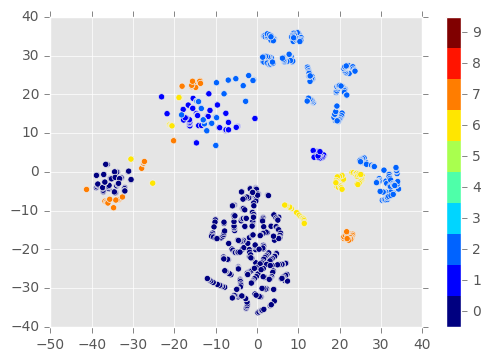

In [4]:
plot_tsne(features_all, labels_all, images_all, perplexity=30, interactive=False)

In [5]:
train_svm_classifier(features_all, labels_all, sns_all, 'model.model', split=True)

train test split == True
Fitting 3 folds for each of 20 candidates, totalling 60 fits
[CV] kernel=linear, C=1 ..............................................
[CV] ............... kernel=linear, C=1, score=0.986175, total=   0.7s
[CV] kernel=linear, C=1 ..............................................


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.9s remaining:    0.0s


[CV] ............... kernel=linear, C=1, score=0.972222, total=   0.7s
[CV] kernel=linear, C=1 ..............................................


[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    1.7s remaining:    0.0s


[CV] ............... kernel=linear, C=1, score=0.995327, total=   0.7s
[CV] kernel=linear, C=10 .............................................
[CV] .............. kernel=linear, C=10, score=0.986175, total=   0.7s
[CV] kernel=linear, C=10 .............................................
[CV] .............. kernel=linear, C=10, score=0.972222, total=   0.7s
[CV] kernel=linear, C=10 .............................................
[CV] .............. kernel=linear, C=10, score=0.995327, total=   0.7s
[CV] kernel=linear, C=100 ............................................
[CV] ............. kernel=linear, C=100, score=0.986175, total=   0.7s
[CV] kernel=linear, C=100 ............................................
[CV] ............. kernel=linear, C=100, score=0.972222, total=   0.7s
[CV] kernel=linear, C=100 ............................................
[CV] ............. kernel=linear, C=100, score=0.995327, total=   0.7s
[CV] kernel=linear, C=1000 ...........................................
[CV] .

[Parallel(n_jobs=1)]: Done  60 out of  60 | elapsed:  1.4min finished


Cannot save trained svm model to model.model

Best parameters set:
SVC(C=100, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape=None, degree=3, gamma=0.01, kernel='rbf',
  max_iter=-1, probability=True, random_state=None, shrinking=True,
  tol=0.001, verbose=False)

Confusion matrix:
Labels: 0,1,2,6,7

[[86  0  0  0  0]
 [ 0 32  0  0  0]
 [ 0  0 74  0  0]
 [ 0  0  0 14  0]
 [ 0  0  0  0 10]]

Classification report:
             precision    recall  f1-score   support

          0       1.00      1.00      1.00        86
          1       1.00      1.00      1.00        32
          2       1.00      1.00      1.00        74
          6       1.00      1.00      1.00        14
          7       1.00      1.00      1.00        10

avg / total       1.00      1.00      1.00       216



GridSearchCV(cv=3, error_score='raise',
       estimator=SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape=None, degree=3, gamma='auto', kernel='rbf',
  max_iter=-1, probability=True, random_state=None, shrinking=True,
  tol=0.001, verbose=False),
       fit_params={}, iid=True, n_jobs=1,
       param_grid=[{'kernel': ['linear'], 'C': [1, 10, 100, 1000]}, {'kernel': ['rbf'], 'C': [1, 10, 100, 1000], 'gamma': [0.01, 0.001, 0.0001, 1e-05]}],
       pre_dispatch='2*n_jobs', refit=True, return_train_score=True,
       scoring=None, verbose=3)

In [6]:
from bokeh.plotting import figure, output_notebook
output_notebook()
from bokeh.plotting import figure, show
from tsne import bh_sne

Loading BokehJS ...

In [12]:
vis_data = bh_sne(features_all, perplexity=50)
vis_x = vis_data[:,0]
vis_y = vis_data[:,1]

vis_data_0 = vis_data[labels_all=='0']
vis_data_1 = vis_data[labels_all=='1']
vis_data_2 = vis_data[labels_all=='2']
vis_data_6 = vis_data[labels_all=='6']
vis_data_7 = vis_data[labels_all=='7']

vis_data_0_x = vis_data_0[:,0]
vis_data_0_y = vis_data_0[:,1]
vis_data_1_x = vis_data_1[:,0]
vis_data_1_y = vis_data_1[:,1]
vis_data_2_x = vis_data_2[:,0]
vis_data_2_y = vis_data_2[:,1]
vis_data_6_x = vis_data_6[:,0]
vis_data_6_y = vis_data_6[:,1]
vis_data_7_x = vis_data_7[:,0]
vis_data_7_y = vis_data_7[:,1]

In [13]:
from bokeh.plotting import figure, output_file, show, ColumnDataSource
from bokeh.models import HoverTool


source1 = ColumnDataSource(
        data=dict(
            x=vis_data_0_x,
            y=vis_data_0_y,
            desc=sns_all[labels_all=='0'],
            imgs = images_all[labels_all=='0']

        )
    )

source2 = ColumnDataSource(
        data=dict(
            x=vis_data_1_x,
            y=vis_data_1_y,
            desc=sns_all[labels_all=='1'],
            imgs=images_all[labels_all=='1']
        )
    )

source3 = ColumnDataSource(
        data=dict(
            x=vis_data_2_x,
            y=vis_data_2_y,
            desc=sns_all[labels_all=='2'],
            imgs=images_all[labels_all=='2']
        )
    )

source4 = ColumnDataSource(
        data=dict(
            x=vis_data_6_x,
            y=vis_data_6_y,
            desc=sns_all[labels_all=='6'],
            imgs=images_all[labels_all=='6']
        )
    )


source5 = ColumnDataSource(
        data=dict(
            x=vis_data_7_x,
            y=vis_data_7_y,
            desc=sns_all[labels_all=='7'],
            imgs=images_all[labels_all=='7']
        )
    )


hover = HoverTool(
        tooltips="""
        <div>
            <div>
                <img
                    src="@imgs" height="80" alt="@imgs" width="80"
                    style="float: left; margin: 0px 15px 15px 0px;"
                    border="2"
                ></img>
            </div>
            <div>
                <span style="font-size: 17px; font-weight: bold;">@desc</span>
            </div>
        </div>
        """
    )

p = figure(plot_width=800, plot_height=800, tools=[hover],
           title="Mouse over the dots")

p.circle('x', 'y', size=20, alpha=0.5, color='green', source=source1)
p.circle('x', 'y', size=20, alpha=0.5, color='red', source=source2)
p.circle('x', 'y', size=20, alpha=0.5, color='blue', source=source3)
p.circle('x', 'y', size=20, alpha=0.5, color='yellow', source=source4)
p.circle('x', 'y', size=20, alpha=0.5, color='Brown', source=source5)

show(p)

In [10]:
for label_class in set(labels_all):
    sns_in_label = sns_all[labels_all == label_class]
    print 'the number of class {} is {}'.format(label_class, len(sns_in_label))
    print 'the number of S/Ns: is {}'.format(len(set(sns_in_label)))
    for sn in set(sns_in_label):
        print '\tthe number of S\N {}:{}'.format(sn, len(sns_all[(labels_all == label_class) & (sns_all == sn)]))

the number of class 1 is 101
the number of S/Ns: is 20
	the number of S\N F3Y65040QLLGY4RA:3
	the number of S\N F3Y65040PAHGY4TA:4
	the number of S\N F3Y650200PEGY4RA:4
	the number of S\N F3Y65030JHTGY4RA:4
	the number of S\N F3Y64910PVQGY4RA:1
	the number of S\N F3Y650309DFGY4TA:4
	the number of S\N F3Y6503094UGY4TA:5
	the number of S\N F3Y65011MQZGY4TA:3
	the number of S\N F3Y650302N5GY4RA:14
	the number of S\N F3Y65030714GY4TA:5
	the number of S\N F3Y65040PC9GY4RA:4
	the number of S\N F3Y64950X2QGY4TA:3
	the number of S\N F3Y650401GKGY4TA:4
	the number of S\N F3Y65030H6ZGY4RA:3
	the number of S\N F3Y650300CPGY4TA:4
	the number of S\N F3Y650308P2GY4TA:4
	the number of S\N F3Y64840AZAGY4TA:23
	the number of S\N F3Y65040UH3GY4TA:2
	the number of S\N F3Y65040QLKGY4RA:3
	the number of S\N F3Y65040NRVGY4RA:4
the number of class 0 is 349
the number of S/Ns: is 15
	the number of S\N 11:24
	the number of S\N 10:22
	the number of S\N 13:23
	the number of S\N 12:23
	the number of S\N 14:25
	th

In [11]:
print 'test'

test
